In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
traindata = pd.read_csv("hr-total-cat-unbalanced.csv",index_col=0)

In [3]:
Y = traindata['is_promoted'].values
X_traindata = traindata.drop('is_promoted', axis=1)
X = X_traindata.values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

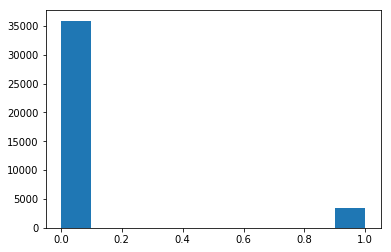

In [6]:
plt.hist(Y_train)
plt.show()

In [7]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
class_weightsl = class_weights.tolist()
class_weightsl

[0.5476144027646174, 5.75051214515657]

In [8]:
# Setup arrays to store train and test accuracies
depth = np.arange(10, 23, 2)
train_accuracy = np.empty(len(depth))
test_accuracy = np.empty(len(depth))

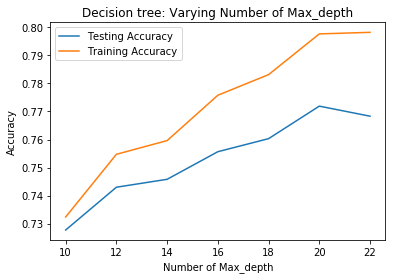

In [9]:

# Create instance (i.e. object) of Decision Tree classifier
# Loop over different values of k
for i, k in enumerate(depth):
    # Setup a Decision Tree classifier Classifier with max depth k
    clf_ent = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                max_depth=k, min_samples_leaf=25,class_weight={0:0.547614402764617, 1:5.75051214515657})
    
    clf_ent.fit(X_train,Y_train)
     #Compute accuracy on the training set
    train_accuracy[i] = clf_ent.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf_ent.score(X_test, Y_test)

# Generate plot
plt.title('Decision tree: Varying Number of Max_depth')
plt.plot(depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Max_depth')
plt.ylabel('Accuracy')
plt.show()

We choose the value of max_depth value where we get highest value of accuracy for test data

In [10]:
# Setup arrays to store train and test accuracies
samples = np.arange(10, 66,3)
train_accuracy = np.empty(len(samples))
test_accuracy = np.empty(len(samples))

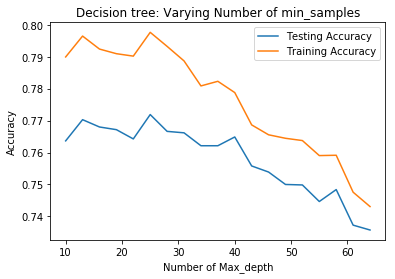

In [11]:
# Import module for fitting

# Create instance (i.e. object) of LogisticRegression
# Loop over different values of k
for i, k in enumerate(samples):
    # Setup a decision tree Classifier with k min_samples_leaf
    clf_ent = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                max_depth=20, min_samples_leaf=k, class_weight={0:0.547614402764617, 1:5.75051214515657})
    
    clf_ent.fit(X_train,Y_train)
     #Compute accuracy on the training set
    train_accuracy[i] = clf_ent.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf_ent.score(X_test, Y_test)

# Generate plot
plt.title('Decision tree: Varying Number of min_samples')
plt.plot(samples, test_accuracy, label = 'Testing Accuracy')
plt.plot(samples, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()

We choose the value of min_samples_leaf value where we get highest value of accuracy for test data

In [12]:
clf_ent = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                max_depth=20, min_samples_leaf=25, class_weight={0:0.547614402764617, 1:5.75051214515657})

In [13]:
clf_ent.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.547614402764617, 1: 5.75051214515657},
            criterion='entropy', max_depth=20, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=25,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [25]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(clf_ent, X, Y, cv=10)
print(cv_results)

[0.76111429 0.77542454 0.76206831 0.7648855  0.76870229 0.75667939
 0.76789464 0.75510594 0.7793472  0.765795  ]


In [26]:
np.mean(cv_results)

0.7657017086954063

In [14]:
y_pred = clf_ent.predict(X_test)
y_pred[0:20]

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [15]:
df = pd.DataFrame(y_pred)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[9229, 2742],
       [ 246,  883]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [19]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     11971
           1       0.24      0.78      0.37      1129

   micro avg       0.77      0.77      0.77     13100
   macro avg       0.61      0.78      0.62     13100
weighted avg       0.91      0.77      0.82     13100



In [22]:
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.7719083969465649


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
clf_ent_roc_auc = roc_auc_score(Y_test, clf_ent.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, clf_ent.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % clf_ent_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('predictive analytics characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Finding out using test data given in the problem set

In [ ]:
X_testdata = pd.read_csv("test-hr-total-cat1.csv",index_col=0)

In [ ]:
X_testdata1 = X_testdata.values

In [ ]:
clf_ent.fit(X, Y)

In [ ]:
final_prediction_unknown = clf_ent.predict(X_testdata)
final_prediction_unknown[0:100]

In [ ]:
final_prediction_unknown = final_prediction_unknown.tolist()
X_testdata['prediction']=final_prediction_unknown
final = X_testdata['prediction']

In [ ]:
final

##Entropy Index

clf_entropy = DecisionTreeClassifier(criterion = "gini", random_state = 100,
 max_depth=7, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)

y_pred_en = clf_entropy.predict(X_test)
y_pred_en[0:20]

print("Accuracy is ", accuracy_score(Y_test,y_pred_en)*100)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred_en)

print(classification_report(Y_test,y_pred_en))

from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(clf_entropy, X, Y, cv=10)
print(cv_results)

np.mean(cv_results)

X_testdata = pd.read_csv("test-data-coded.csv",index_col=0)

y_pred = clf_gini.predict(X_testdata)
y_pred[0:20]

pd.merge(X_testdata)